# YOLOv12 Road Defects Detection Training

**Dataset:** 5 classes (alligator cracking, linear cracking, patching, pothole, rutting)  
**Train:** 3386 images (70%) | **Valid:** 972 images (20%) | **Test:** 486 images (10%)  
**Epochs:** 300 | **Image Size:** 640x640  
**Preprocessing:** Auto-Orient, Resize to 640x640  
**Augmentations:** None

## 1. Setup Environment

In [ ]:
# Check GPU availability
!nvidia-smi

Fri Oct 31 06:20:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          Off |   00000000:00:05.0 Off |                    0 |
| N/A   31C    P0             51W /  400W |       0MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
# Install dependencies
!pip install ultralytics -q

# Import libraries
import os
import yaml
import zipfile
import shutil
import matplotlib.pyplot as plt
from IPython.display import Image, display
from ultralytics import YOLO
import pandas as pd

print('✅ Setup complete!')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Setup complete!


## 2. Mount Google Drive & Extract Dataset

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extract dataset from Google Drive
zip_path = '/content/drive/MyDrive/Road Defects Detection.v1i.yolov12.zip'
extract_path = '/content/dataset'

os.makedirs(extract_path, exist_ok=True)
print('📦 Extracting dataset...')

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print('✅ Dataset extracted successfully!')
!ls -la /content/dataset

📦 Extracting dataset...
✅ Dataset extracted successfully!
total 32
drwxr-xr-x 5 root root 4096 Oct 31 06:21 .
drwxr-xr-x 1 root root 4096 Oct 31 06:21 ..
-rw-r--r-- 1 root root  370 Oct 31 06:21 data.yaml
-rw-r--r-- 1 root root  177 Oct 31 06:21 README.dataset.txt
-rw-r--r-- 1 root root 1009 Oct 31 06:21 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Oct 31 06:21 test
drwxr-xr-x 4 root root 4096 Oct 31 06:21 train
drwxr-xr-x 4 root root 4096 Oct 31 06:21 valid


## 3. Configure Dataset

In [ ]:
# Find data.yaml file
dataset_dir = None
for root, dirs, files in os.walk(extract_path):
    if 'data.yaml' in files:
        dataset_dir = root
        break

if dataset_dir is None:
    raise FileNotFoundError('data.yaml not found in extracted dataset')

print(f'📁 Dataset directory: {dataset_dir}')

# Update data.yaml with absolute paths
yaml_path = os.path.join(dataset_dir, 'data.yaml')
with open(yaml_path, 'r') as f:
    data_config = yaml.safe_load(f)

data_config['train'] = os.path.join(dataset_dir, 'train/images')
data_config['val'] = os.path.join(dataset_dir, 'valid/images')
data_config['test'] = os.path.join(dataset_dir, 'test/images')

with open(yaml_path, 'w') as f:
    yaml.dump(data_config, f, default_flow_style=False)

# Display dataset info
print(f"\n📊 Dataset Configuration:")
print(f"Number of classes: {data_config['nc']}")
print(f"Class names: {data_config['names']}")
print(f"\nDataset Statistics:")
print(f"Training images: {len(os.listdir(data_config['train']))}")
print(f"Validation images: {len(os.listdir(data_config['val']))}")
print(f"Test images: {len(os.listdir(data_config['test']))}")

📁 Dataset directory: /content/dataset

📊 Dataset Configuration:
Number of classes: 5
Class names: ['alligator cracking', 'linear cracking', 'patching', 'pothole', 'rutting']

Dataset Statistics:
Training images: 3386
Validation images: 972
Test images: 486


## 4. Train YOLOv12 Model

In [ ]:
# Initialize YOLOv12 model
# Options: yolo12n.pt (nano), yolo12s.pt (small), yolo12m.pt (medium), yolo12l.pt (large), yolo12x.pt (xlarge)
model = YOLO('yolo12m.pt')
print('✅ YOLOv12 model loaded')

✅ YOLOv12 model loaded


In [ ]:
# Train the model for 300 epochs
print('🚀 Starting training with 300 epochs...')
print('This will take several hours depending on your GPU.\n')

results = model.train(
    data=yaml_path,
    epochs=300,
    imgsz=640,
    batch=16,
    name='road_defects_yolov12',
    patience=50,
    save=True,
    save_period=10,
    cache=True,
    device=0,
    workers=8,
    project='runs/detect',
    exist_ok=True,
    optimizer='auto',
    verbose=True,
    cos_lr=True,
    amp=True,
    plots=True
)

print('\n✅ Training completed!')

🚀 Starting training with 300 epochs...
This will take several hours depending on your GPU.

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=road_defects_yolov12, nbs=64, nms=False,

## 5. Display Training Graphs

📊 Training Results:

Training Metrics (Loss, Precision, Recall, mAP):


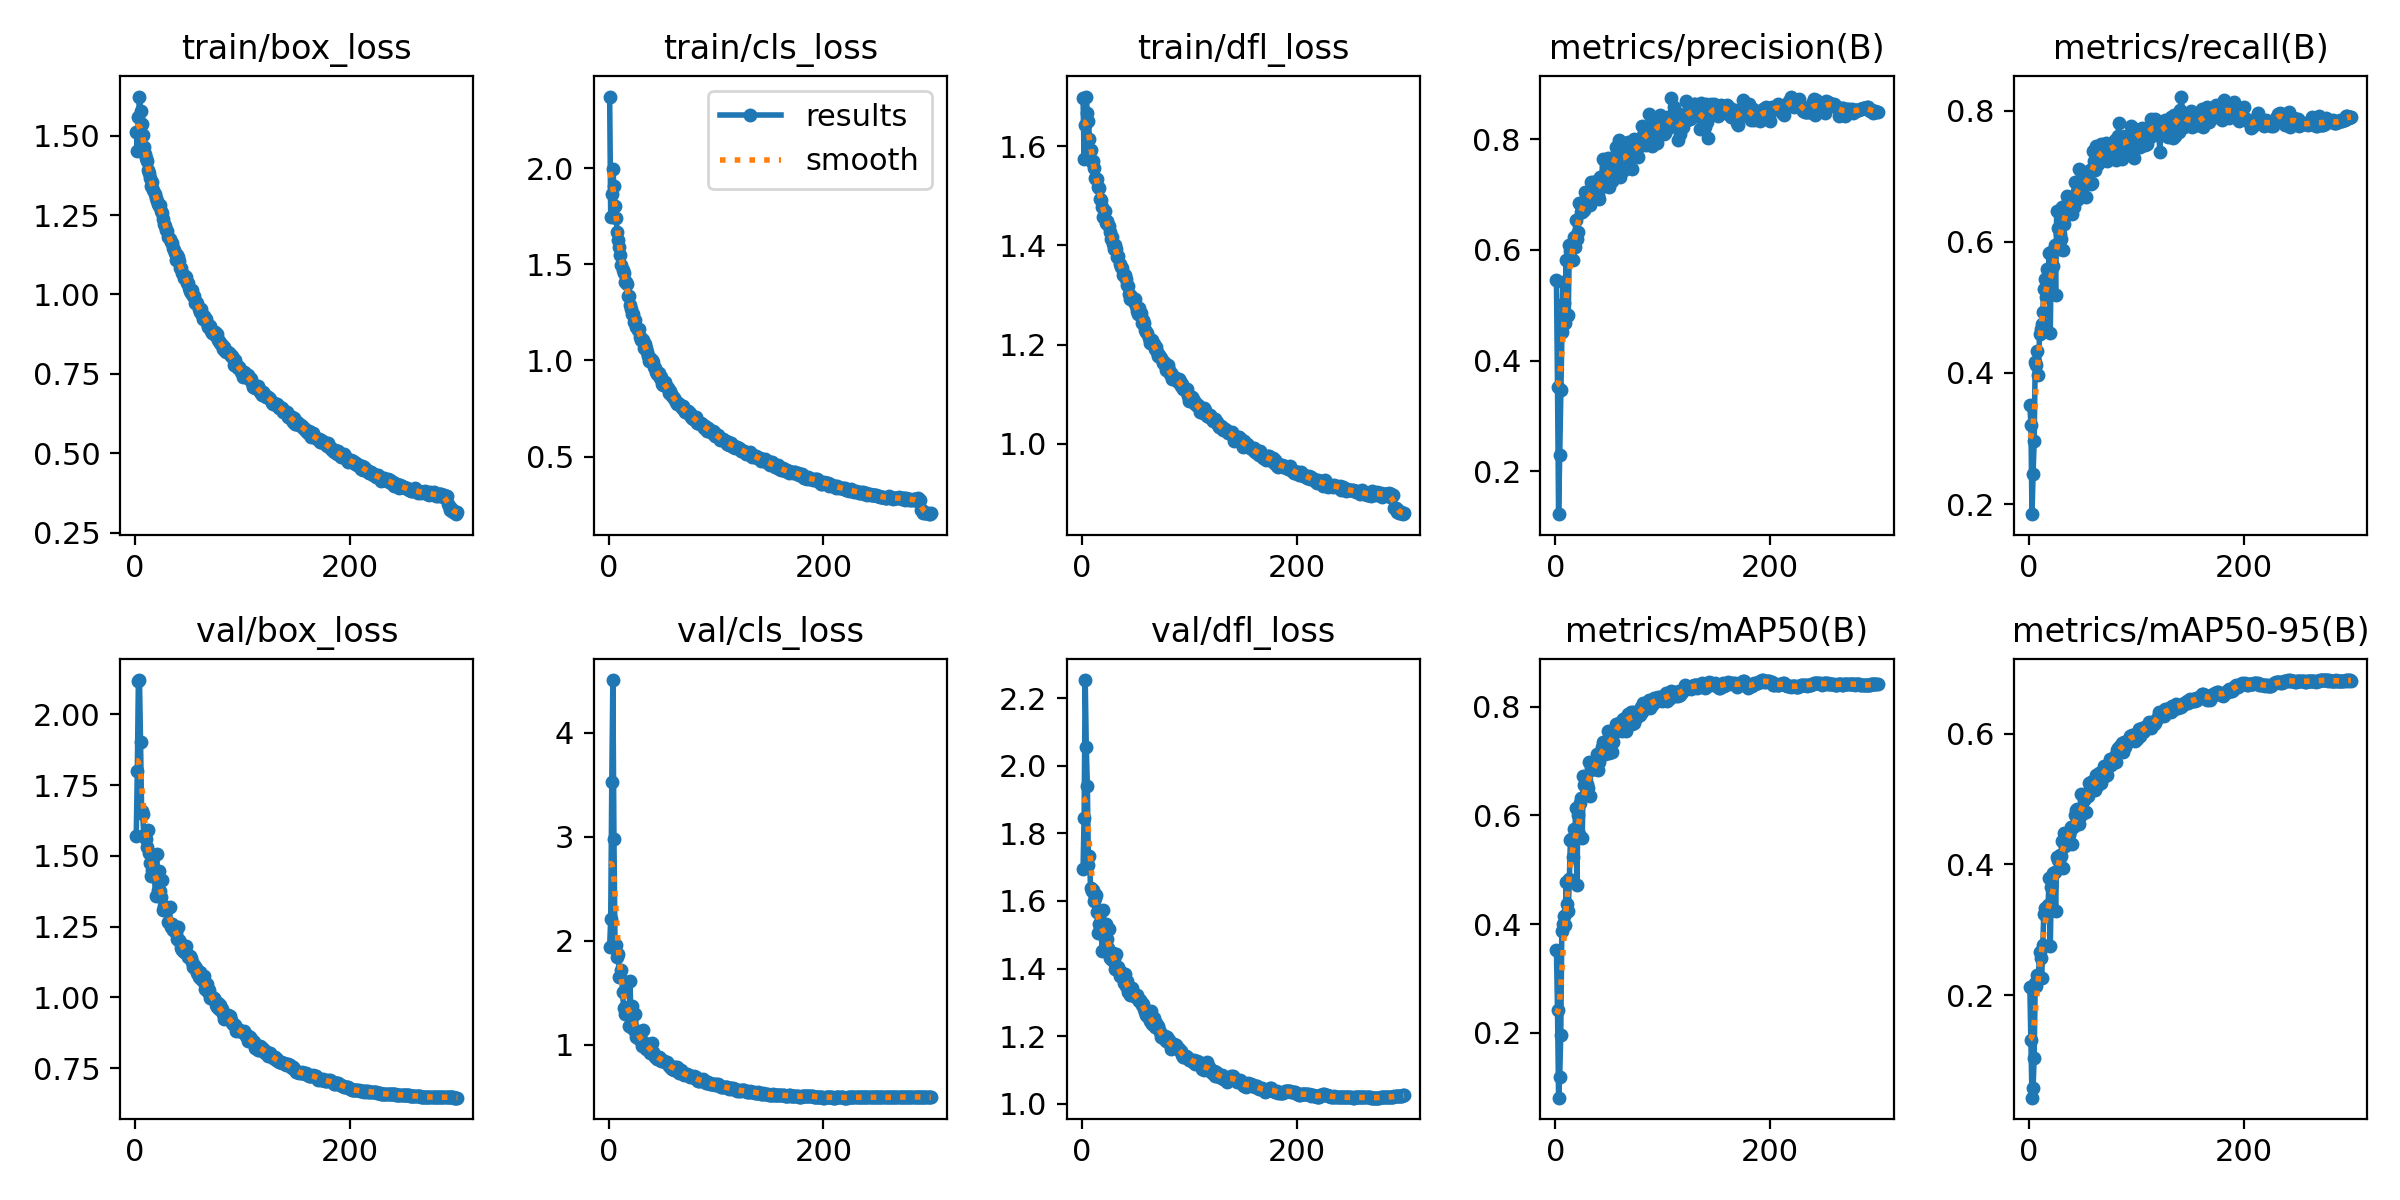

In [ ]:
# Display all training graphs
results_dir = 'runs/detect/road_defects_yolov12'

print('📊 Training Results:\n')

# Training metrics graph
results_img = os.path.join(results_dir, 'results.png')
if os.path.exists(results_img):
    print('Training Metrics (Loss, Precision, Recall, mAP):')
    display(Image(filename=results_img))
else:
    print('⚠️ results.png not found')

## 6. Display Confusion Matrix

📊 Confusion Matrices:

Confusion Matrix:


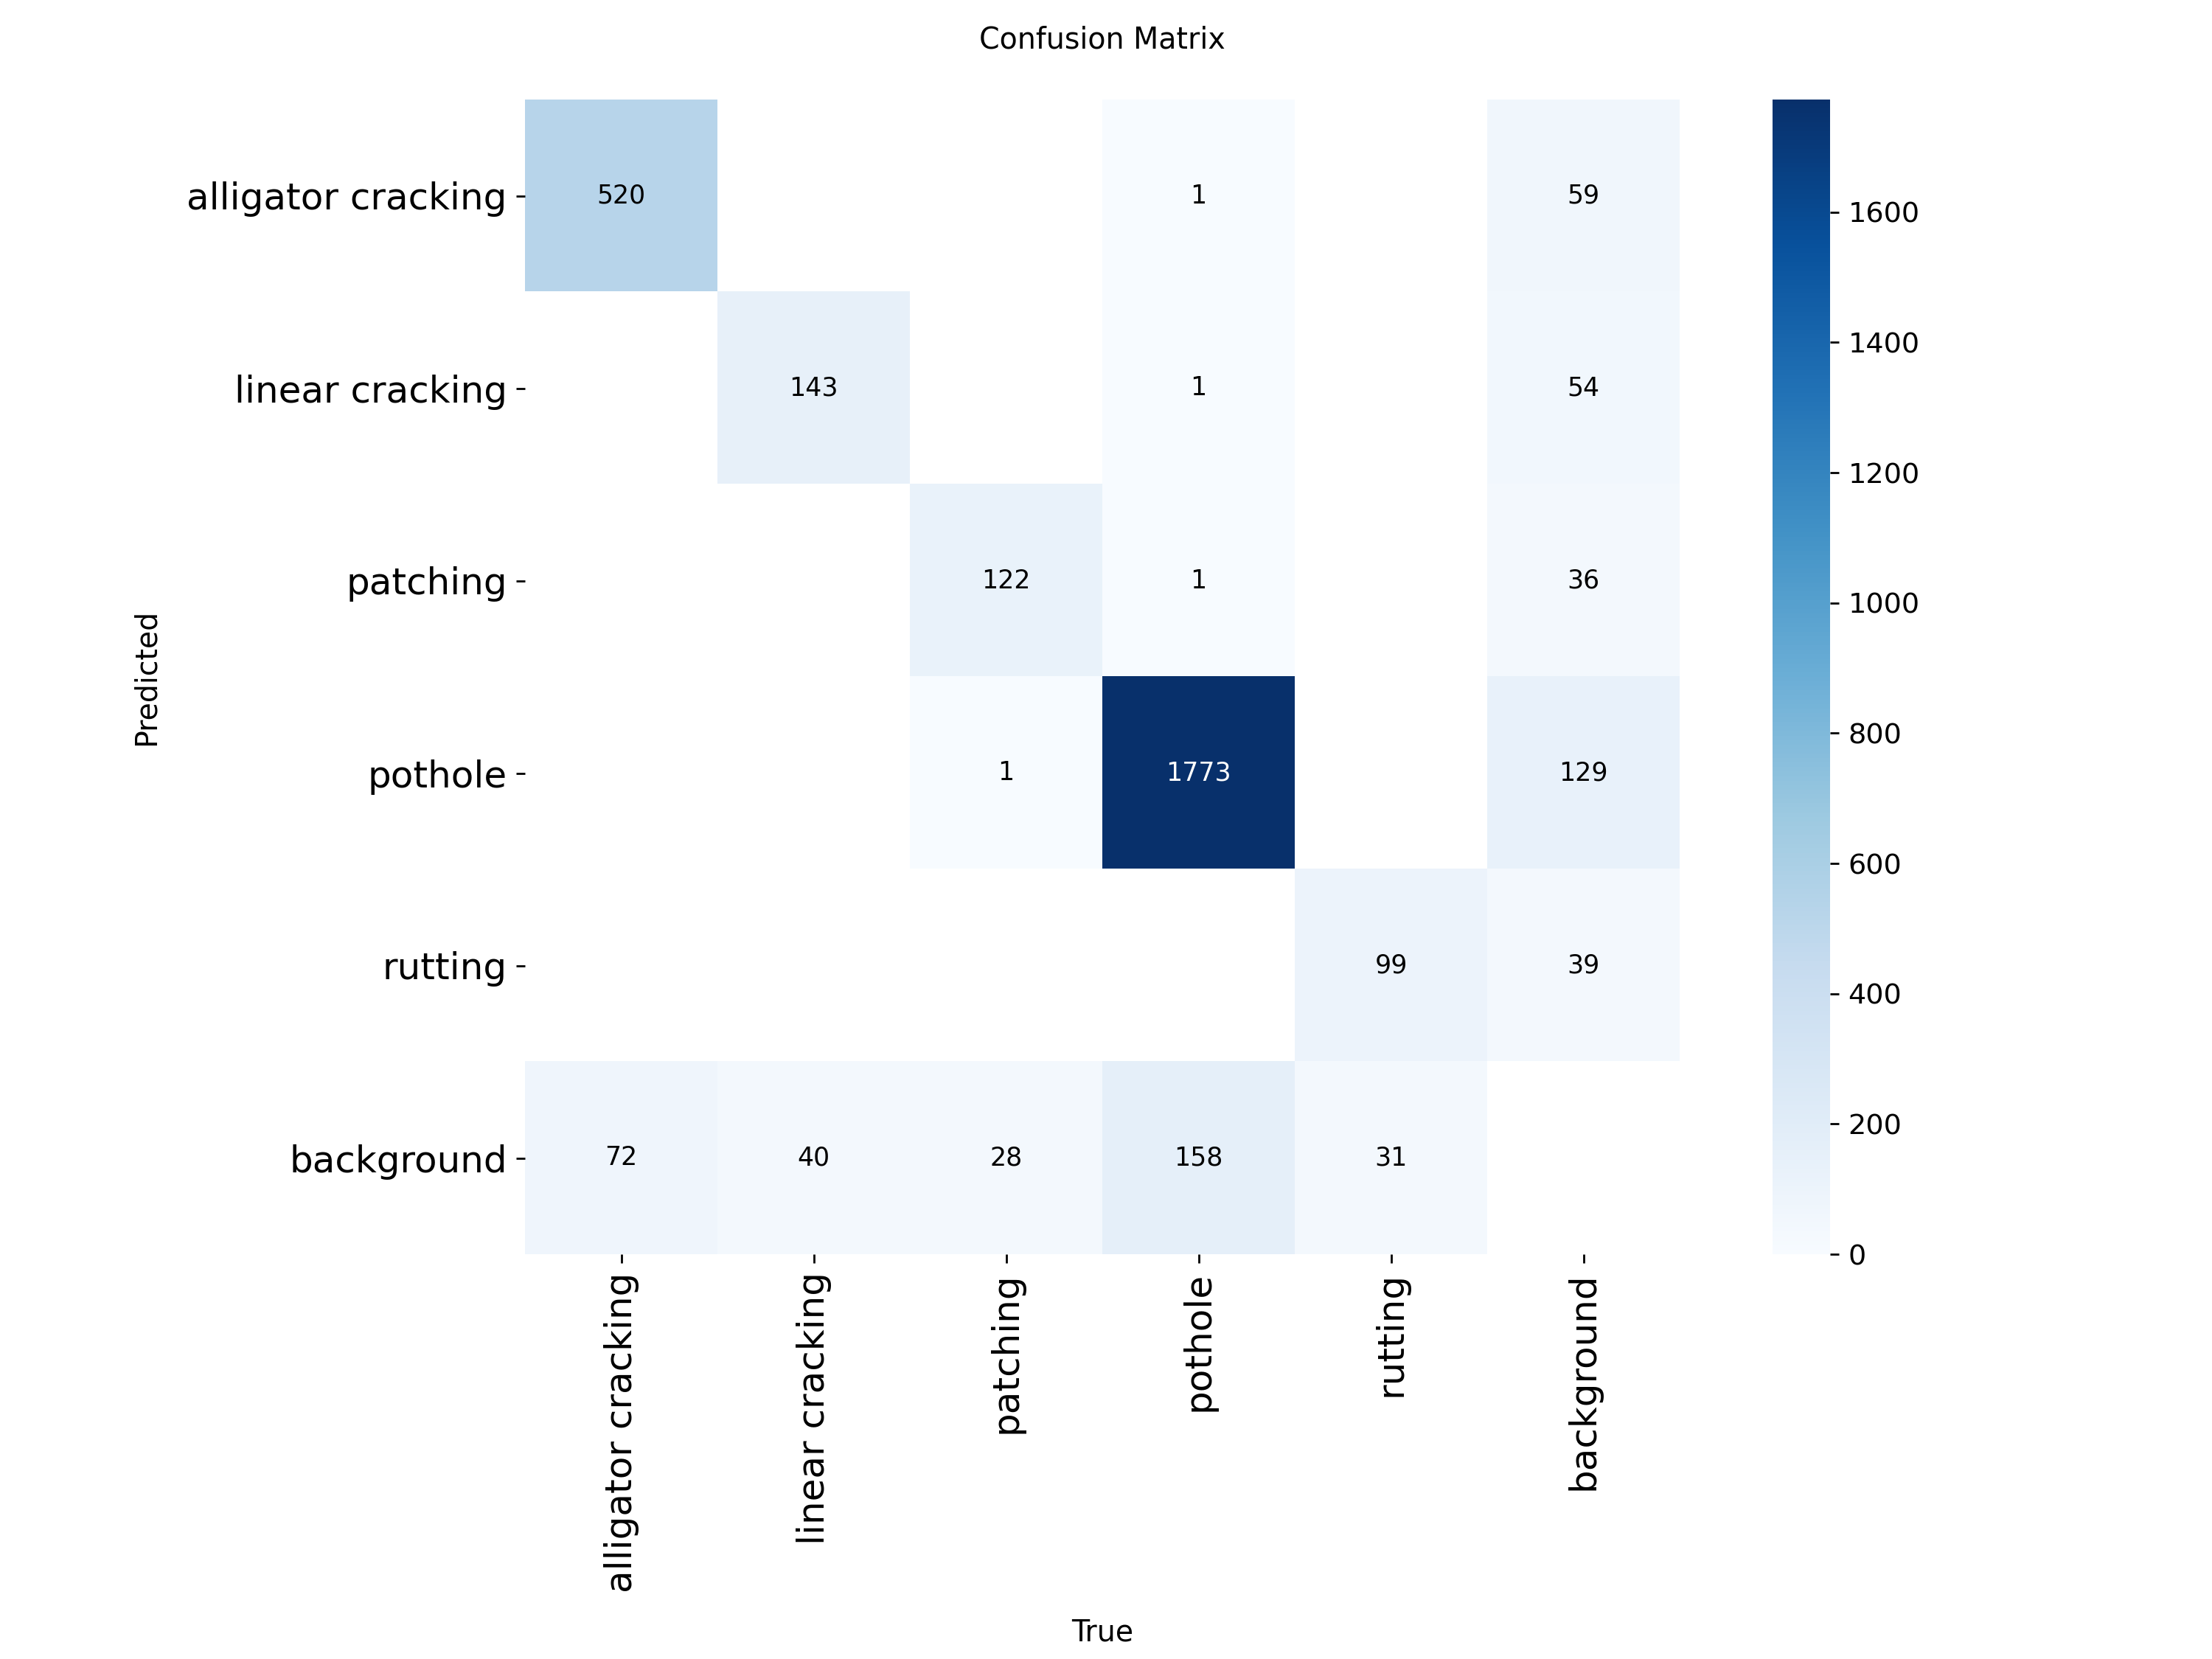


Normalized Confusion Matrix:


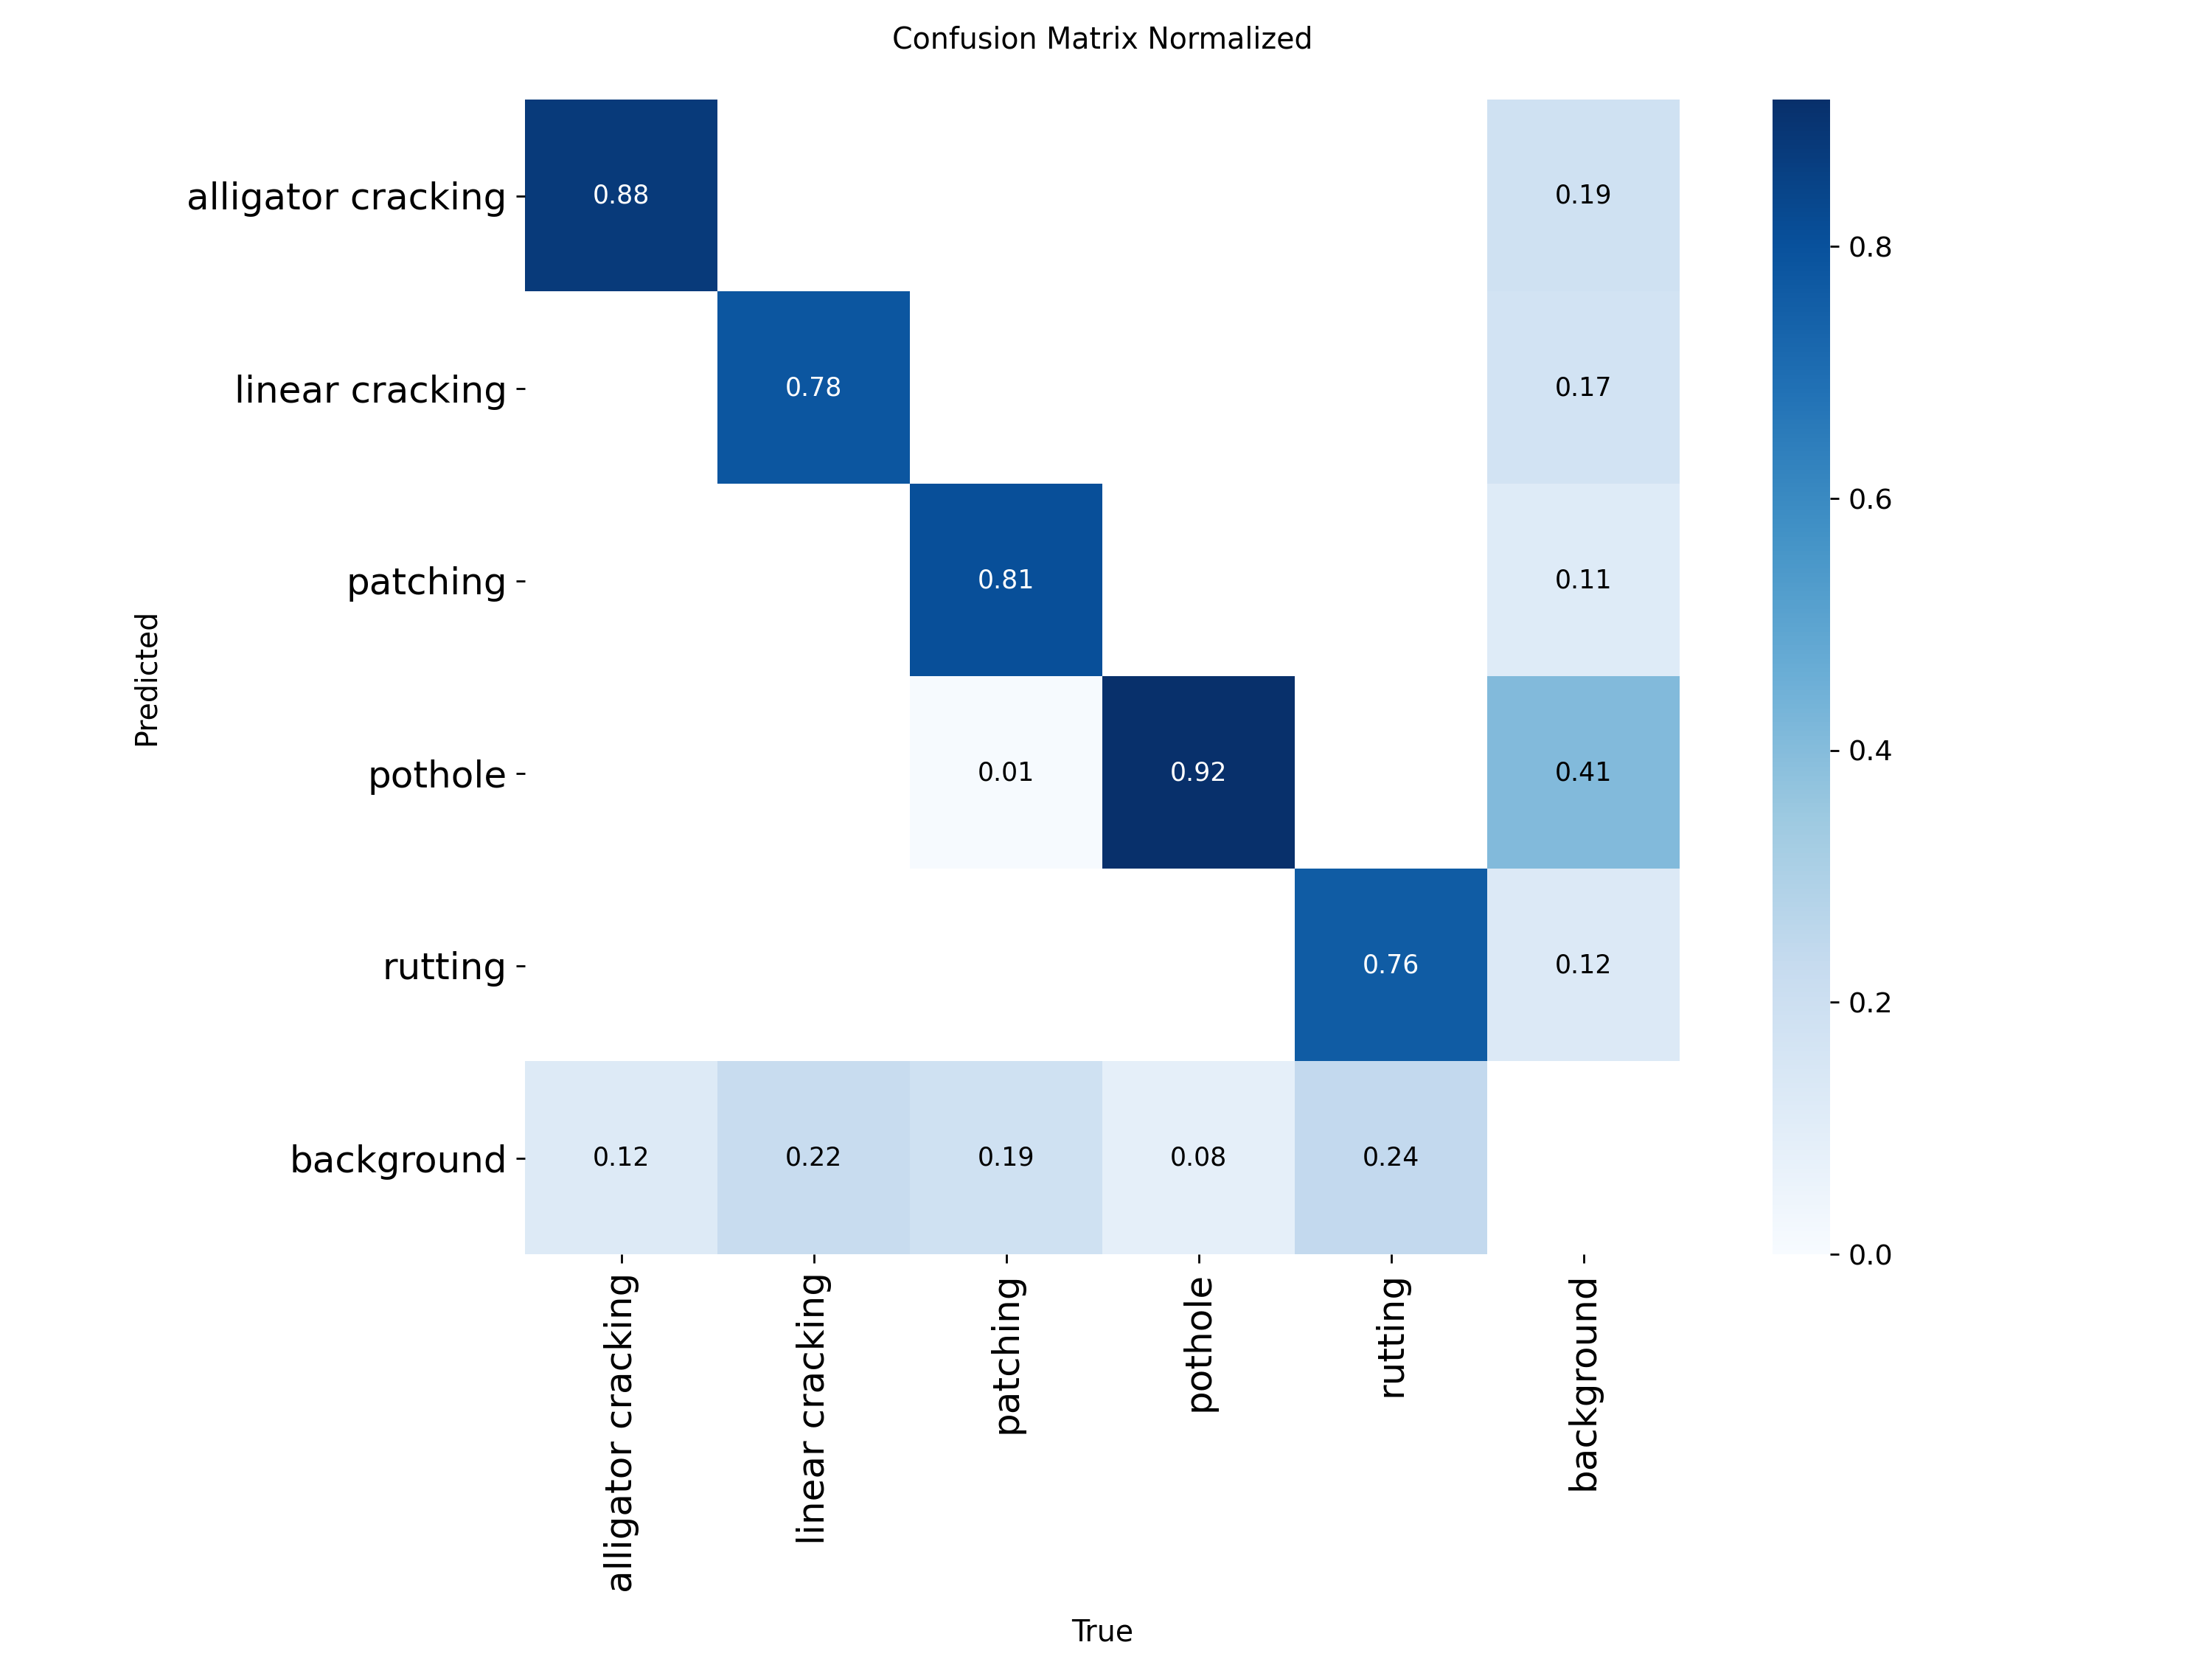

In [ ]:
# Display confusion matrices
print('📊 Confusion Matrices:\n')

confusion_matrix_img = os.path.join(results_dir, 'confusion_matrix.png')
if os.path.exists(confusion_matrix_img):
    print('Confusion Matrix:')
    display(Image(filename=confusion_matrix_img))

confusion_matrix_norm_img = os.path.join(results_dir, 'confusion_matrix_normalized.png')
if os.path.exists(confusion_matrix_norm_img):
    print('\nNormalized Confusion Matrix:')
    display(Image(filename=confusion_matrix_norm_img))

In [ ]:
# Display additional performance curves
print('\n📊 Additional Performance Curves:\n')

for img_file in ['F1_curve.png', 'P_curve.png', 'R_curve.png', 'PR_curve.png']:
    img_path = os.path.join(results_dir, img_file)
    if os.path.exists(img_path):
        print(f'{img_file.replace("_", " ").replace(".png", "")}:')
        display(Image(filename=img_path))
        print()


📊 Additional Performance Curves:



## 7. Validation Set Evaluation - Average Precision by Class (mAP50)

🔍 Evaluating on Validation Set...

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
YOLOv12m summary (fused): 169 layers, 20,108,767 parameters, 0 gradients, 67.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 921.0±271.8 MB/s, size: 61.6 KB)
val: Scanning /content/dataset/valid/labels.cache... 972 images, 49 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 972/972 1.6Mit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 294, len(boxes) = 2990. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 61/61 7.2it/s 8.5s
                   all        972       2990      0.852       0.78      0.842      0.682
    alligator cracking        379        592      0.914      0.842      0.918  

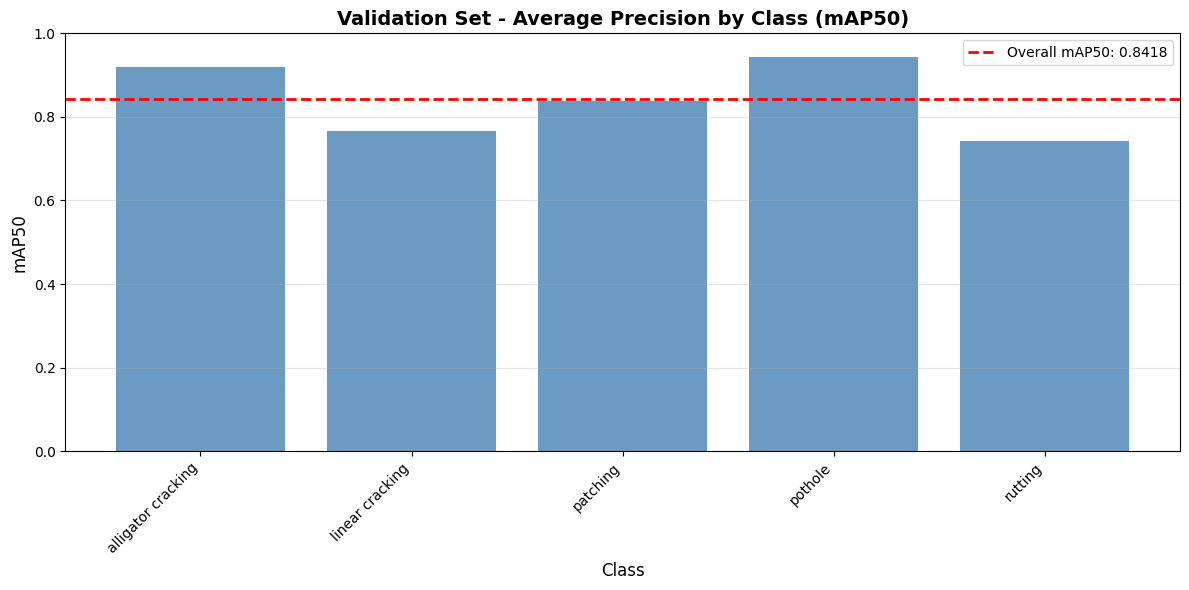


✅ Validation evaluation completed!


In [ ]:
# Load best trained model
best_model = YOLO(os.path.join(results_dir, 'weights/best.pt'))
print('🔍 Evaluating on Validation Set...\n')

# Validate on validation set
val_results = best_model.val(
    data=yaml_path,
    split='val',
    imgsz=640,
    batch=16,
    device=0,
    plots=True
)

# Display overall metrics
print('\n📊 Validation Set - Overall Metrics:')
print(f'mAP50: {val_results.box.map50:.4f}')
print(f'mAP50-95: {val_results.box.map:.4f}')
print(f'Precision: {val_results.box.mp:.4f}')
print(f'Recall: {val_results.box.mr:.4f}')

# Display per-class mAP50
class_names = data_config['names']
print('\n📈 Average Precision by Class (mAP50) - Validation Set:')
for name, ap in zip(class_names, val_results.box.ap50):
    print(f'{name}: {ap:.4f}')

# Create bar chart for validation set
plt.figure(figsize=(12, 6))
plt.bar(class_names, val_results.box.ap50, color='steelblue', alpha=0.8)
plt.xlabel('Class', fontsize=12)
plt.ylabel('mAP50', fontsize=12)
plt.title('Validation Set - Average Precision by Class (mAP50)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.axhline(y=val_results.box.map50, color='red', linestyle='--', linewidth=2, label=f'Overall mAP50: {val_results.box.map50:.4f}')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'validation_map50_by_class.png'), dpi=300, bbox_inches='tight')
plt.show()

print('\n✅ Validation evaluation completed!')

## 8. Test Set Evaluation - Average Precision by Class (mAP50)

🔍 Evaluating on Test Set...

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 561.0±201.1 MB/s, size: 52.4 KB)
val: Scanning /content/dataset/test/labels... 486 images, 19 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 486/486 1.5Kit/s 0.3s
val: New cache created: /content/dataset/test/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 182, len(boxes) = 1574. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 31/31 6.1it/s 5.1s
                   all        486       1574      0.874      0.755      0.825       0.67
    alligator cracking        176        294      0.946      0.864      0.932       0.86
       linear cracking        

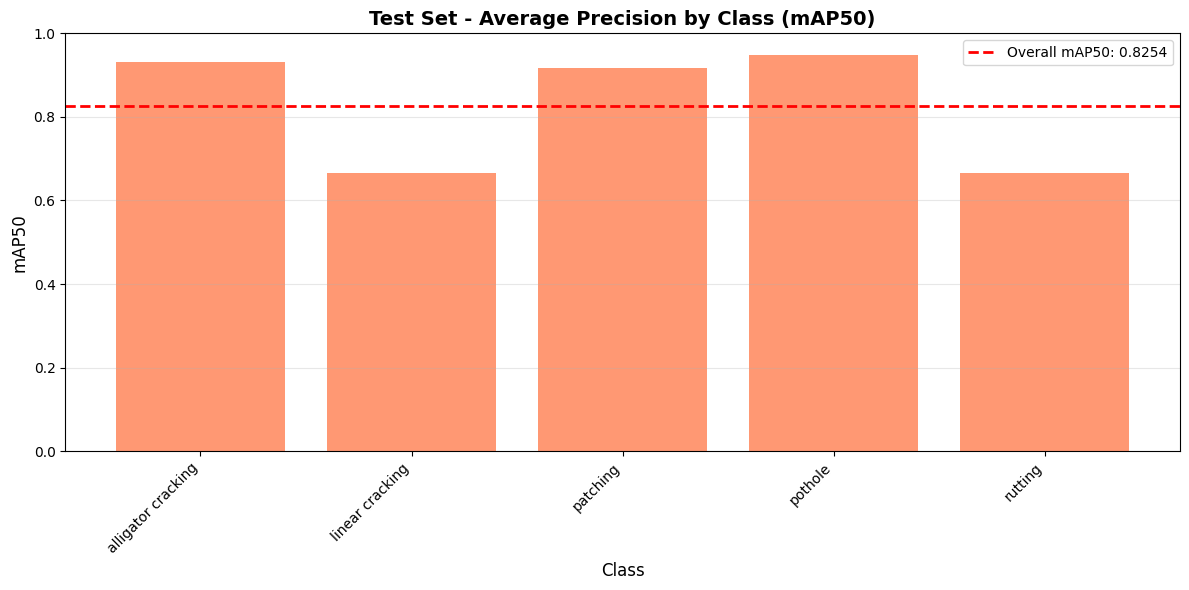


✅ Test evaluation completed!


In [ ]:
print('🔍 Evaluating on Test Set...\n')

# Validate on test set
test_results = best_model.val(
    data=yaml_path,
    split='test',
    imgsz=640,
    batch=16,
    device=0,
    plots=True
)

# Display overall metrics
print('\n📊 Test Set - Overall Metrics:')
print(f'mAP50: {test_results.box.map50:.4f}')
print(f'mAP50-95: {test_results.box.map:.4f}')
print(f'Precision: {test_results.box.mp:.4f}')
print(f'Recall: {test_results.box.mr:.4f}')

# Display per-class mAP50
print('\n📈 Average Precision by Class (mAP50) - Test Set:')
for name, ap in zip(class_names, test_results.box.ap50):
    print(f'{name}: {ap:.4f}')

# Create bar chart for test set
plt.figure(figsize=(12, 6))
plt.bar(class_names, test_results.box.ap50, color='coral', alpha=0.8)
plt.xlabel('Class', fontsize=12)
plt.ylabel('mAP50', fontsize=12)
plt.title('Test Set - Average Precision by Class (mAP50)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.axhline(y=test_results.box.map50, color='red', linestyle='--', linewidth=2, label=f'Overall mAP50: {test_results.box.map50:.4f}')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'test_map50_by_class.png'), dpi=300, bbox_inches='tight')
plt.show()

print('\n✅ Test evaluation completed!')

## 9. Validation vs Test Comparison

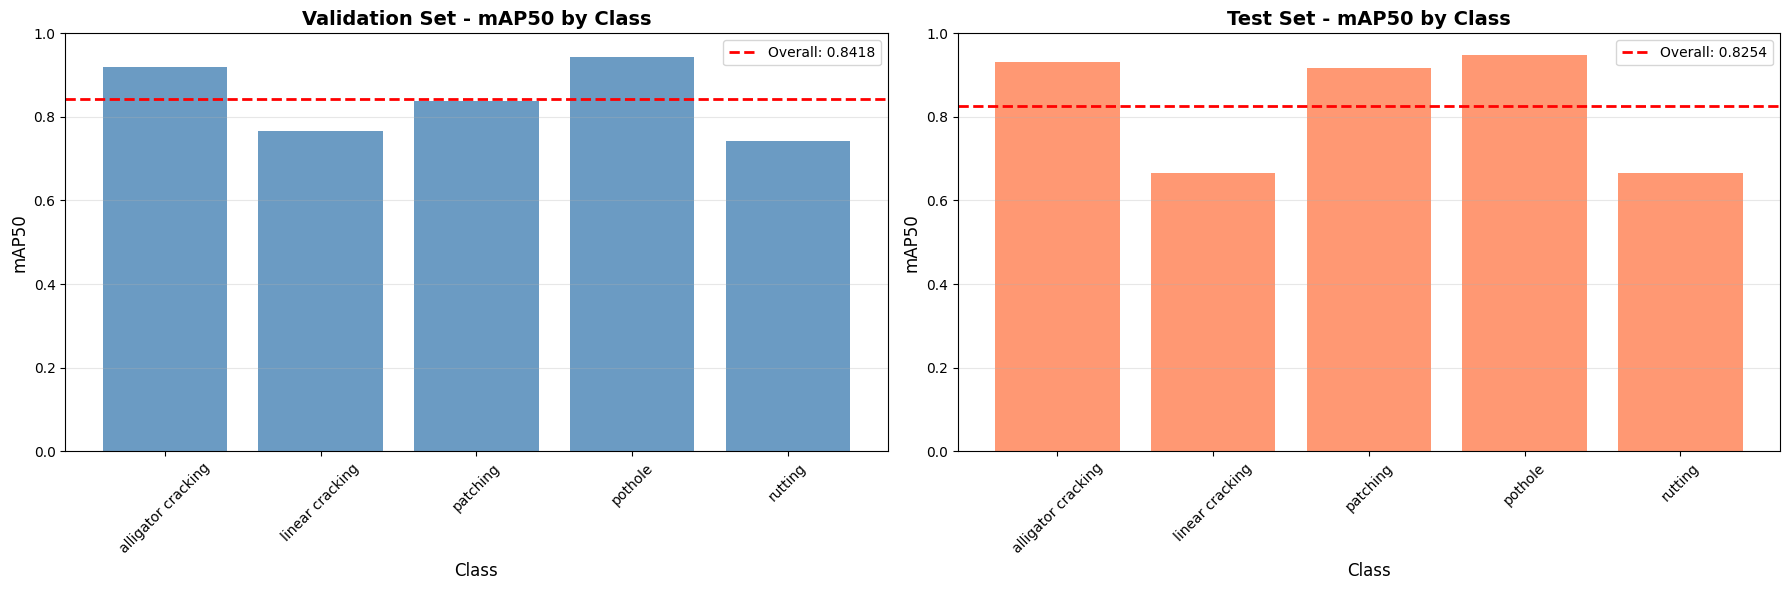


📊 Performance Summary:
   Metric Validation Set Test Set
    mAP50         0.8418   0.8254
 mAP50-95         0.6816   0.6702
Precision         0.8523   0.8744
   Recall         0.7805   0.7555

✅ Summary saved to runs/detect/road_defects_yolov12/performance_summary.csv


In [ ]:
# Create side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Validation Set
axes[0].bar(class_names, val_results.box.ap50, color='steelblue', alpha=0.8)
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('mAP50', fontsize=12)
axes[0].set_title('Validation Set - mAP50 by Class', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 1)
axes[0].grid(axis='y', alpha=0.3)
axes[0].axhline(y=val_results.box.map50, color='red', linestyle='--', linewidth=2, label=f'Overall: {val_results.box.map50:.4f}')
axes[0].legend()

# Test Set
axes[1].bar(class_names, test_results.box.ap50, color='coral', alpha=0.8)
axes[1].set_xlabel('Class', fontsize=12)
axes[1].set_ylabel('mAP50', fontsize=12)
axes[1].set_title('Test Set - mAP50 by Class', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', alpha=0.3)
axes[1].axhline(y=test_results.box.map50, color='red', linestyle='--', linewidth=2, label=f'Overall: {test_results.box.map50:.4f}')
axes[1].legend()

plt.tight_layout()
plt.savefig(os.path.join(results_dir, 'validation_vs_test_comparison.png'), dpi=300, bbox_inches='tight')
plt.show()

# Create summary table
summary = pd.DataFrame({
    'Metric': ['mAP50', 'mAP50-95', 'Precision', 'Recall'],
    'Validation Set': [
        f'{val_results.box.map50:.4f}',
        f'{val_results.box.map:.4f}',
        f'{val_results.box.mp:.4f}',
        f'{val_results.box.mr:.4f}'
    ],
    'Test Set': [
        f'{test_results.box.map50:.4f}',
        f'{test_results.box.map:.4f}',
        f'{test_results.box.mp:.4f}',
        f'{test_results.box.mr:.4f}'
    ]
})

print('\n📊 Performance Summary:')
print(summary.to_string(index=False))

# Save summary
summary.to_csv(os.path.join(results_dir, 'performance_summary.csv'), index=False)
print(f'\n✅ Summary saved to {os.path.join(results_dir, "performance_summary.csv")}')

## 10. Export Trained Model

In [ ]:
# Export model to multiple formats
print('📦 Exporting trained model to multiple formats...\n')

# Export to ONNX (recommended for deployment)
onnx_path = best_model.export(format='onnx', imgsz=640)
print(f'✅ ONNX exported: {onnx_path}')

# Export to TorchScript
torchscript_path = best_model.export(format='torchscript', imgsz=640)
print(f'✅ TorchScript exported: {torchscript_path}')

# Export to TensorFlow SavedModel
tf_path = best_model.export(format='saved_model', imgsz=640)
print(f'✅ TensorFlow SavedModel exported: {tf_path}')

# Export to TFLite (for mobile deployment)
tflite_path = best_model.export(format='tflite', imgsz=640)
print(f'✅ TFLite exported: {tflite_path}')

print('\n✅ All model exports completed!')

📦 Exporting trained model to multiple formats...

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/detect/road_defects_yolov12/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 9, 8400) (38.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 4.7s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.72...
ONNX: export success ✅ 8.3s, saved as 'runs/detect/road_defects_yolov12/weights/best.onnx' (77.0 MB)

Export complete (9.1s)
Results saved to /content/runs/detect/road_defects_yolov12/weights
Predict:         yolo pr

In [ ]:
# Copy trained models to Google Drive for safekeeping
print('💾 Saving models to Google Drive...\n')

save_dir = '/content/drive/MyDrive/YOLOv12_Road_Defects_Models'
os.makedirs(save_dir, exist_ok=True)

# Copy PyTorch weights
shutil.copy(os.path.join(results_dir, 'weights/best.pt'), os.path.join(save_dir, 'best.pt'))
print(f'✅ Best model saved: {os.path.join(save_dir, "best.pt")}')

shutil.copy(os.path.join(results_dir, 'weights/last.pt'), os.path.join(save_dir, 'last.pt'))
print(f'✅ Last model saved: {os.path.join(save_dir, "last.pt")}')

# Copy results and graphs
results_save_dir = os.path.join(save_dir, 'results')
os.makedirs(results_save_dir, exist_ok=True)

for file in ['results.png', 'confusion_matrix.png', 'confusion_matrix_normalized.png',
             'validation_map50_by_class.png', 'test_map50_by_class.png',
             'validation_vs_test_comparison.png', 'performance_summary.csv']:
    src = os.path.join(results_dir, file)
    if os.path.exists(src):
        shutil.copy(src, os.path.join(results_save_dir, file))

print(f'✅ Results saved: {results_save_dir}')
print(f'\n🎉 All files saved to Google Drive: {save_dir}')

💾 Saving models to Google Drive...

✅ Best model saved: /content/drive/MyDrive/YOLOv12_Road_Defects_Models/best.pt
✅ Last model saved: /content/drive/MyDrive/YOLOv12_Road_Defects_Models/last.pt
✅ Results saved: /content/drive/MyDrive/YOLOv12_Road_Defects_Models/results

🎉 All files saved to Google Drive: /content/drive/MyDrive/YOLOv12_Road_Defects_Models


## Summary

✅ **Training Complete!**

**What was accomplished:**
1. ✅ Trained YOLOv12 model for 300 epochs
2. ✅ Generated training graphs (loss, precision, recall, mAP)
3. ✅ Created confusion matrices (regular and normalized)
4. ✅ Evaluated on validation set with per-class mAP50
5. ✅ Evaluated on test set with per-class mAP50
6. ✅ Exported model to multiple formats (ONNX, TorchScript, TensorFlow, TFLite)
7. ✅ Saved all models and results to Google Drive

**Files saved to Google Drive:**
- `best.pt` - Best model weights
- `last.pt` - Last epoch weights
- All training graphs and evaluation results